In [1]:
import random
import math
import time

In [2]:
cities1 = {
    7: (50, 50),
    8: (55, 45),
    11: (55, 65),
    14: (62, 57),
    19: (62, 48),
    35: (55, 50),
    38: (47, 66),
    53: (55, 57),
    59: (70, 64),
    65: (50, 70),
    66: (57, 72)
}

cities2 = {
    3: (21, 45),
    4: (45, 35),
    6: (33, 34),
    9: (26, 59),
    10: (40, 66),
    12: (35, 51),
    17: (33, 44),
    18: (9, 56),
    25: (17, 64),
    26: (41, 46),
    31: (31, 76),
    32: (22, 53),
    39: (30, 60),
    40: (30, 50),
    44: (21, 48),
    50: (15, 56),
    51: (29, 39),
    55: (10, 70),
    58: (40, 60),
    67: (45, 42),
    68: (38, 33),
    72: (35, 60),
    75: (40, 37),
    76: (40, 40)
}

cities3 = {
    1: (22, 22),
    16: (21, 36),
    22: (26, 13),
    23: (11, 28),
    24: (7, 43),
    33: (26, 29),
    41: (12, 17),
    42: (15, 14),
    43: (16, 19),
    49: (12, 38),
    56: (6, 25),
    62: (30, 20),
    63: (20, 30),
    64: (15, 5),
    73: (27, 24)
}

cities4 = {
    2: (36, 26),
    5: (55, 20),
    13: (62, 35),
    15: (62, 24),
    20: (66, 14),
    21: (44, 13),
    27: (55, 34),
    28: (35, 16),
    29: (52, 26),
    30: (43, 26),
    34: (50, 40),
    36: (54, 10),
    37: (60, 15),
    45: (50, 30),
    46: (51, 42),
    47: (50, 15),
    48: (48, 21),
    52: (54, 38),
    54: (67, 41),
    57: (65, 27),
    60: (64, 4),
    61: (36, 6),
    69: (50, 4),
    70: (66, 8),
    71: (59, 5),
    74: (40, 20)
}

clusters = [cities1, cities2, cities3, cities4]

In [3]:
# Funkcje pomocnicze
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def total_distance(tour, cities):
    return sum(distance(cities[tour[i]], cities[tour[(i + 1) % len(tour)]]) for i in range(len(tour)))

def two_opt_swap(tour, i, k):
    new_tour = tour[:i]
    new_tour.extend(reversed(tour[i:k + 1]))
    new_tour.extend(tour[k + 1:])
    return new_tour

def simulated_annealing(cities, initial_temp, cooling_rate, min_temp=1, max_no_improve=1000):
    temp = initial_temp
    current_tour = list(cities.keys())
    random.shuffle(current_tour)
    current_distance = total_distance(current_tour, cities)
    best_tour = current_tour[:]
    best_distance = current_distance
    no_improve_count = 0

    while temp > min_temp and no_improve_count < max_no_improve:
        i, k = sorted(random.sample(range(1, len(current_tour) - 1), 2))
        new_tour = two_opt_swap(current_tour, i, k)
        new_distance = total_distance(new_tour, cities)
        
        if new_distance < current_distance or random.random() < math.exp((current_distance - new_distance) / temp):
            current_tour = new_tour
            current_distance = new_distance
            no_improve_count = 0  # Reset no improvement counter
            if new_distance < best_distance:
                best_tour = new_tour
                best_distance = new_distance
        else:
            no_improve_count += 1  # Increment if no improvement

        temp *= 1 - cooling_rate
    
    return best_tour, best_distance

In [4]:
start_time = time.time()

# Rozwiązanie dla każdego klastra osobno
all_tours = []
for cluster in clusters:
    initial_temp = 200000
    cooling_rate = 0.00001
    best_tour, best_distance = simulated_annealing(cluster, initial_temp, cooling_rate)
    all_tours.append(best_tour)

# Łączenie tras z różnych klastrów w jedną
overall_tour = all_tours[0]
for i in range(1, len(all_tours)):
    end_city = overall_tour[-1]
    start_city = min(all_tours[i], key=lambda city: distance(clusters[i-1][end_city], clusters[i][city]))
    start_index = all_tours[i].index(start_city)
    overall_tour.extend(all_tours[i][start_index:] + all_tours[i][:start_index])

# Dodaj powrót do początkowego miasta, aby zamknąć trasę
overall_tour.append(overall_tour[0])

# Obliczanie całkowitej długości trasy
cities_combined = {**cities1, **cities2, **cities3, **cities4}
overall_distance = total_distance(overall_tour, cities_combined)

# Pomiar czasu wykonania
end_time = time.time()

In [5]:
print("Overall tour:", overall_tour)
print("Overall distance:", overall_distance)
print("Time taken:", end_time - start_time)

Overall tour: [14, 59, 19, 8, 35, 7, 53, 38, 65, 66, 11, 10, 67, 26, 76, 75, 4, 68, 6, 51, 17, 12, 40, 3, 44, 32, 50, 18, 55, 25, 9, 39, 72, 58, 31, 24, 49, 23, 56, 41, 43, 42, 64, 22, 62, 73, 1, 33, 63, 16, 2, 74, 28, 61, 21, 69, 36, 47, 5, 15, 57, 37, 20, 70, 60, 71, 54, 13, 27, 52, 46, 34, 45, 29, 48, 30, 14]
Overall distance: 684.4296430417229
Time taken: 91.66439032554626


In [6]:
import matplotlib.pyplot as plt


def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def nearest_neighbor(cities, start_city=None):
    if not cities:
        return [], 0
    unvisited = set(cities.keys())
    current = start_city or next(iter(cities))
    tour = [current]
    tour_length = 0

    while len(unvisited) > 1:
        unvisited.remove(current)
        nearest = min(unvisited, key=lambda city: distance(cities[current], cities[city]))
        tour_length += distance(cities[current], cities[nearest])
        tour.append(nearest)
        current = nearest

    return tour, tour_length

def connect_clusters(clusters):
    overall_tour = []
    overall_length = 0
    start_city = next(iter(clusters[0]))

    for i in range(len(clusters)):
        if i > 0:
            start_city = min(clusters[i], key=lambda city: distance(clusters[i][city], clusters[i-1][overall_tour[-1]]))
        tour, length = nearest_neighbor(clusters[i], start_city=start_city)
        if i > 0:
            overall_length += distance(clusters[i-1][overall_tour[-1]], clusters[i][tour[0]])
        overall_tour.extend(tour)
        overall_length += length

    # Dodaj odległość powrotu do pierwszego miasta, aby zamknąć trasę
    overall_length += distance(clusters[0][overall_tour[0]], clusters[i][overall_tour[-1]])
    overall_tour.append(overall_tour[0])

    return overall_tour, overall_length

def plot_tour(tour, clusters):
    plt.figure(figsize=(10, 7))
    # Łączenie wszystkich punktów w jedną listę
    all_points = {city: pos for cluster in clusters for city, pos in cluster.items()}
    # Rysowanie punktów
    for city, pos in all_points.items():
        plt.plot(pos[0], pos[1], 'bo')
        plt.text(pos[0], pos[1], str(city), fontsize=12, ha='right')

    # Rysowanie linii łączących miasta
    for i in range(1, len(tour)):
        start_pos = all_points[tour[i-1]]
        end_pos = all_points[tour[i]]
        plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'r-')

    plt.title('Wizualizacja trasy komiwojażera')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid(True)
    plt.show()

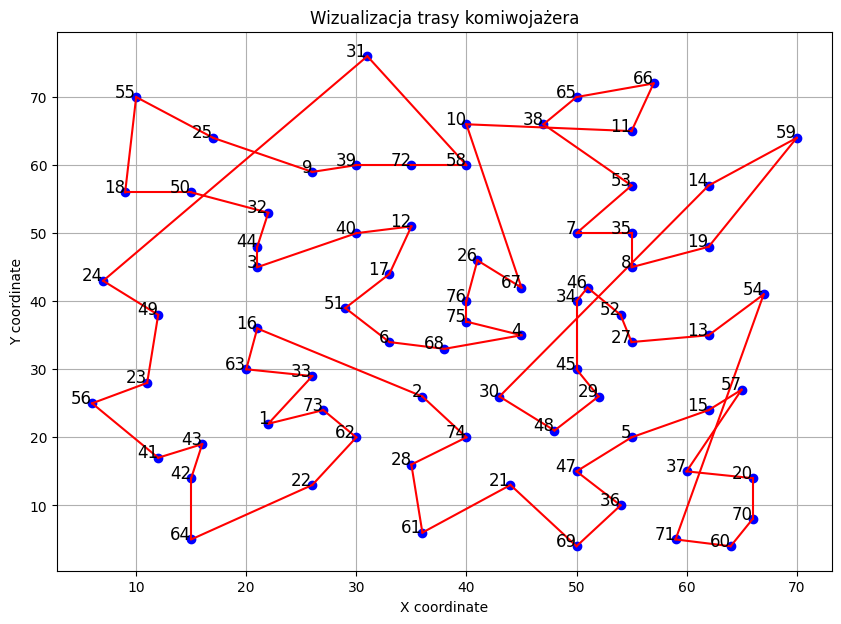

In [7]:
# Wizualizacja trasy
plot_tour(overall_tour, clusters)